In [1]:
# import package
import numpy as np
import pandas as pd

import os

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
%matplotlib inline
import plotly.express as px

In [2]:
df = pd.read_csv('D:/University/NĂM 3/Kì 6/Basic Data Analysis/Project/Data and analyze/Data/car_insurance_claim.csv')

In [3]:
df.drop('BIRTH', axis=1, inplace=True)

In [4]:
df['INCOME'] = df['INCOME'].str.replace('$', '').str.replace(',', '').astype(float)
df['HOME_VAL'] = df['HOME_VAL'].str.replace('$', '').str.replace(',', '').astype(float)
df['OLDCLAIM'] = df['OLDCLAIM'].str.replace('$', '').str.replace(',', '').astype(float)
df['CLM_AMT'] = df['CLM_AMT'].str.replace('$', '').str.replace(',', '').astype(float)
df['GENDER'] = df['GENDER'].str.replace('z_', '')
df['MSTATUS'] = df['MSTATUS'].str.replace('z_', '')
df['EDUCATION'] = df['EDUCATION'].str.replace('z_','').str.replace('<','')
df['OCCUPATION'] = df['OCCUPATION'].str.replace('z_','')
df['BLUEBOOK'] = df['BLUEBOOK'].str.replace('$','').str.replace(',','').astype(int) 
df['CAR_TYPE'] = df['CAR_TYPE'].str.replace('z_','')
df['CAR_TYPE'] = df['CAR_TYPE'].str.replace('z_','')
df['URBANICITY'] = df['URBANICITY'].str.replace('Highly Urban/ ','').str.replace('z_Highly Rural/ ','')

In [5]:
df['CLM_AMT'].mask(df['CLM_AMT'] >= 1, 1, inplace=True)

In [6]:
df['CLM_AMT'].value_counts()

0.0    7556
1.0    2746
Name: CLM_AMT, dtype: int64

In [7]:
subsets = []
for i in df.columns:
    if i != 'ID':
        subsets.append(i)

print('Number of rows before drop duplicate: %s' %len(df))
df.drop_duplicates(subset=subsets, keep=False)
print('number of rows after drop duplicate: %s' %len(df))

Number of rows before drop duplicate: 10302
number of rows after drop duplicate: 10302


In [8]:
# Check null
def missing_value_table(df):

    # create missing column
    missing_value = df.isna().sum()

    # create percentage missing column
    percentage_missing = 100 * df.isna().sum() / len(df)

    # concat 2 columns
    table_1 = pd.concat([missing_value,percentage_missing], axis=1)

    # rename 2 columns
    table_2 = table_1.rename(columns={0:'Missing Value', 1:'Percentage of Missing'})

    # sort the missing value by descending
    table_3 = table_2[table_2.iloc[:,1] != 0].sort_values('Percentage of Missing', ascending=False).round(1)

    # Print some sentence
    print('These dataframe has', str(df.shape[1]), 'columns')
    print('These dataframe has', str(table_3.shape[0]), 'columns which has null values')

    return(table_3)

In [9]:
df['OCCUPATION'].fillna(df['OCCUPATION'].mode()[0], inplace=True)

In [10]:
df['CAR_AGE'].fillna(df['CAR_AGE'].median(), inplace=True)
df['HOME_VAL'].fillna(df['HOME_VAL'].median(), inplace=True)
df['INCOME'].fillna(df['INCOME'].median(), inplace=True)
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)

In [11]:
# Delete instances (rows) which are outliers
from scipy import stats
print("Number of rows before filtering outliers:", len(df))

filtered_entries = np.array ([True] * len(df)) # Nhân giá trị True với số lần = độ dài df2 và để trong array

for col in ['AGE','INCOME','HOME_VAL','BLUEBOOK','OLDCLAIM','CLM_AMT']:
  zscore = abs(stats.zscore(df[col]))
  filtered_entries = (zscore < 3)

df2 = df[filtered_entries].copy()
print("Number of rows after filtering outliers:",len(df2))

Number of rows before filtering outliers: 10302
Number of rows after filtering outliers: 10302


In [12]:
print('Before drop: %s' %df2.shape[0])
df2[subsets].drop_duplicates()
print('After drop: %s' %df2.shape[0])

Before drop: 10302
After drop: 10302


In [13]:
df2['PARENT1'] = df2['PARENT1'].map({'No':0, 'Yes':1}).astype(int)
df2['MSTATUS'] = df2['MSTATUS'].map({'No':0, 'Yes':1}).astype(int)
df2['GENDER'] = df2['GENDER'].map({'M':1, 'F':0}).astype(int)
df2['CAR_USE'] = df2['CAR_USE'].map({'Private':1, 'Commercial':0}).astype(int)
df2['RED_CAR'] = df2['RED_CAR'].map({'no':0, 'yes':1}).astype(int)
df2['REVOKED'] = df2['REVOKED'].map({'No':0, 'Yes':1}).astype(int)
df2['URBANICITY'] = df2['URBANICITY'].map({'Urban':1, 'Rural':0}).astype(int)

In [14]:
# Using one-hot encoding to change the value of 3 columns has 3 or more unique values
for i in ['EDUCATION', 'CAR_TYPE','OCCUPATION']:
    onehots = pd.get_dummies(df2[i],prefix=i)
    df2=df2.join(onehots)

In [15]:
df2 = df2.drop(columns=['EDUCATION', 'CAR_TYPE','OCCUPATION'])

In [16]:
'''
df2['AGE'] = df2['AGE'].astype(int)
df2['YOJ'] = df2['YOJ'].astype(int)
df2['INCOME'] = df2['INCOME'].astype(int)
df2['HOME_VAL'] = df2['HOME_VAL'].astype(int)
df2['OLDCLAIM'] = df2['OLDCLAIM'].astype(int)
df2['CLM_AMT'] = df2['CLM_AMT'].astype(int)
df2['CAR_AGE'] = df2['CAR_AGE'].astype(int)
'''

"\ndf2['AGE'] = df2['AGE'].astype(int)\ndf2['YOJ'] = df2['YOJ'].astype(int)\ndf2['INCOME'] = df2['INCOME'].astype(int)\ndf2['HOME_VAL'] = df2['HOME_VAL'].astype(int)\ndf2['OLDCLAIM'] = df2['OLDCLAIM'].astype(int)\ndf2['CLM_AMT'] = df2['CLM_AMT'].astype(int)\ndf2['CAR_AGE'] = df2['CAR_AGE'].astype(int)\n"

In [34]:
x = df2[[col for col in df2.columns if col not in ['CLM_AMT','CLAIM_FLAG','ID', 'TRAVTIME', 'YOJ', 'TIF']]]
y = df2['CLAIM_FLAG']
print(x.shape)
print(y.shape)

(10302, 35)
(10302,)


In [35]:
x
# missing_value_table(x) - no null

,KIDSDRIV,AGE,HOMEKIDS,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,CAR_USE,BLUEBOOK,...,CAR_TYPE_Sports Car,CAR_TYPE_Van,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student
0,0,60.0,0,67349.0,0,0.0,0,1,1,14230,...,0,0,0,0,0,0,0,0,1,0
1,0,43.0,0,91449.0,0,257252.0,0,1,0,14940,...,0,0,1,0,0,0,0,0,0,0
2,0,48.0,0,52881.0,0,0.0,0,1,1,21970,...,0,1,0,0,0,0,0,1,0,0
3,0,35.0,1,16039.0,0,124191.0,1,0,1,4010,...,0,0,0,1,0,0,0,0,0,0
4,0,51.0,0,53529.0,0,306251.0,1,1,1,15440,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,1,45.0,2,164669.0,0,386273.0,1,1,1,13270,...,0,0,0,0,0,0,0,1,0,0
10298,0,46.0,0,107204.0,0,332591.0,1,1,0,24490,...,0,0,1,0,0,0,0,0,0,0
10299,0,48.0,0,39837.0,0,170611.0,1,0,1,13820,...,0,0,1,0,0,0,0,0,0,0
10300,0,50.0,0,43445.0,0,149248.0,1,0,1,22550,...,0,0,0,0,0,1,0,0,0,0


In [36]:
y

0        0
1        0
2        0
3        0
4        0
        ..
10297    0
10298    0
10299    0
10300    0
10301    0
Name: CLAIM_FLAG, Length: 10302, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=11)

In [38]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

y_test.isna().sum()

(7211, 35)
(3091, 35)
(7211,)
(3091,)


0

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7211 entries, 3194 to 10137
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 7211 non-null   int64  
 1   AGE                      7211 non-null   float64
 2   HOMEKIDS                 7211 non-null   int64  
 3   INCOME                   7211 non-null   float64
 4   PARENT1                  7211 non-null   int32  
 5   HOME_VAL                 7211 non-null   float64
 6   MSTATUS                  7211 non-null   int32  
 7   GENDER                   7211 non-null   int32  
 8   CAR_USE                  7211 non-null   int32  
 9   BLUEBOOK                 7211 non-null   int32  
 10  RED_CAR                  7211 non-null   int32  
 11  OLDCLAIM                 7211 non-null   float64
 12  CLM_FREQ                 7211 non-null   int64  
 13  REVOKED                  7211 non-null   int32  
 14  MVR_PTS             

In [40]:
from imblearn import over_sampling

x_train_smt, y_train_smt = over_sampling.SMOTE(random_state=3).fit_resample(x_train, y_train)

In [41]:
# Before Oversampling
print('Target before oversampling:')
print(pd.Series(y_train).value_counts())

Target before oversampling:
0    5326
1    1885
Name: CLAIM_FLAG, dtype: int64


In [42]:
# Setelah Oversampling
print('Target after oversampling:')
print(pd.Series(y_train_smt).value_counts())

Target after oversampling:
1    5326
0    5326
Name: CLAIM_FLAG, dtype: int64


In [43]:
missing_value_table(x_train_smt)

These dataframe has 35 columns
These dataframe has 0 columns which has null values


,Missing Value,Percentage of Missing


In [44]:
y_train_smt.isna().sum()

0

In [45]:
x_train_smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   KIDSDRIV                 10652 non-null  int64  
 1   AGE                      10652 non-null  float64
 2   HOMEKIDS                 10652 non-null  int64  
 3   INCOME                   10652 non-null  float64
 4   PARENT1                  10652 non-null  int32  
 5   HOME_VAL                 10652 non-null  float64
 6   MSTATUS                  10652 non-null  int32  
 7   GENDER                   10652 non-null  int32  
 8   CAR_USE                  10652 non-null  int32  
 9   BLUEBOOK                 10652 non-null  int32  
 10  RED_CAR                  10652 non-null  int32  
 11  OLDCLAIM                 10652 non-null  float64
 12  CLM_FREQ                 10652 non-null  int64  
 13  REVOKED                  10652 non-null  int32  
 14  MVR_PTS               

In [46]:
# Model Evaluation Classification test
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_validate
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train_smt)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train_smt)
    
    print("Accuracy: ", round(accuracy_score(y_test, y_pred),3))
    print("Precision:",round(precision_score(y_test, y_pred),3))
    print("Recall: ",round(recall_score(y_test, y_pred),3))
    print("F1-Score: ",round(f1_score(y_test, y_pred),3))  
    score = cross_validate(model, x, y, cv=20, scoring='roc_auc', return_train_score=True)

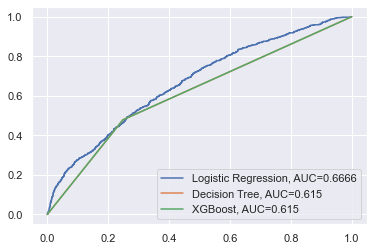

In [47]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model1 = LogisticRegression(random_state=5)
model1.fit(x_train_smt, y_train_smt)
y_pred = model1.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

# Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model2 = DecisionTreeClassifier(random_state=5)
model2.fit(x_train_smt, y_train_smt)
y_pred = model2.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#
from xgboost import XGBClassifier

model3 = XGBClassifier(random_state=5)
model3.fit(x_train_smt, y_train_smt)
y_pred = model2.predict_proba(x_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="XGBoost, AUC="+str(auc))

plt.legend()

In [48]:

#print(y_test.isna().sum())
#print(y_pred.isna().sum())

In [49]:
model1 = LogisticRegression(random_state=2)
model1.fit(x_train_smt, y_train_smt)
eval_classification(model1)

Accuracy:  0.626
Precision: 0.388
Recall:  0.596
F1-Score:  0.47


In [50]:
# Decision Tree algorithm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
model2 = DecisionTreeClassifier(random_state=2)
model2.fit(x_train_smt, y_train_smt)
eval_classification(model2)

Accuracy:  0.675
Precision: 0.427
Recall:  0.485
F1-Score:  0.454


In [51]:
from xgboost import XGBClassifier

model3 = XGBClassifier(random_state=2)
model3.fit(x_train_smt, y_train_smt)
eval_classification(model3)

Accuracy:  0.767
Precision: 0.604
Recall:  0.476
F1-Score:  0.532
